<a href="https://colab.research.google.com/github/zhuqiwen/e533-deep-learning-systems-2023-fall/blob/main/hw1/1-pytorch_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Softmax class

In [40]:
class Softmax(nn.Module):

  def __init__(self, inputLength, outputLength):
    super(Softmax, self).__init__()
    self.inputLength = inputLength
    self.outputLength = outputLength
    self.linear = nn.Linear(inputLength, outputLength)
    self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
    self.lossFn = nn.CrossEntropyLoss()
    self.batchSize = 16


  def forward(self, x):
    return self.linear(x)

## Trainer class
* train() wraps the process of training
* collectAccuracyHistory() collects accuracy for each epoch
* getAccuracyHistory() returns a list of accuracy history for plotting

In [ ]:
# train
class Trainer():
  def __init__(self, model, trainLoader, validateLoader, epochs=200):
    self.accuracyHistory = []
    self.model = model
    self.trainLoader = trainLoader
    self.validateLoader = validateLoader
    self.epochs = epochs

  def train(self):
    for epoch in range(self.epochs):
      for i, (imgs, labels) in enumerate(self.trainLoader):
        self.model.optimizer.zero_grad()
        outputs = self.model(imgs.view(-1, self.model.inputLength))
        loss = self.model.lossFn(outputs, labels)
        loss.backward()
        self.model.optimizer.step()
      self.collectAccuracyHistory()


  def collectAccuracyHistory(self):
    # get validateData size from data loader
    correct = 0
    for imgs, labels in self.validateLoader:
      outputs = self.model(imgs.view(-1, self.model.inputLength))
      _, predicted = torch.max(outputs.data, 1)
      correct = correct + (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(self.validateLoader.dataset)
    self.accuracyHistory.append(accuracy)

  def getAccuracyHistory(self):
    return self.accuracyHistory

## Utility functions
* getDataLoaders() returns a tuple of training data loader and validating data loader
* getData() wraps the process of downloading MNIST dataset

In [ ]:

def getDataLoaders(trainData, validateData, batchSize):
  tl = DataLoader(dataset=trainData, batch_size=batchSize)
  vl = DataLoader(dataset=validateData, batch_size=batchSize)
  return (tl, vl)

# prepare data
def getData(dataSize=0):
  data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
  data = list(data)
  if dataSize != 0 and dataSize <= len(data):
    data = data[:dataSize]
  trainLength = int(len(data) * 0.8)
  return (data[:trainLength], data[trainLength:])

## Run
1. get data
2. prepare necessary parameters: epochs, input length, output length
3. initiate the softmax model
4. get data loaders
5. initiate a trainer object
6. train
7. get accuracy history
8. plot accuracy hitory

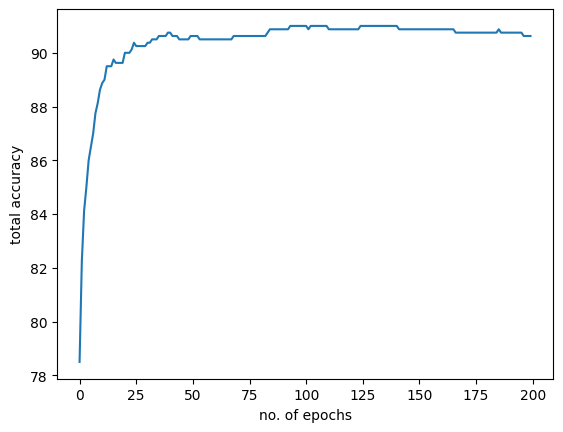

In [41]:
# get data
trainData, validateData = getData(4000)
# prepare parameters
inputLength = trainData[0][0].size(dim=1) * trainData[0][0].size(dim=2)
outputLength = 10
epochs = 200
# get model instance
model = Softmax(inputLength, outputLength)
# get data loaders
trainLoader, validateLoader = getDataLoaders(trainData, validateData, model.batchSize)
# get trainer instance
trainer = Trainer(model, trainLoader, validateLoader, epochs)
# train
trainer.train()
# get accuracy history
accuracyHistory = trainer.getAccuracyHistory()
# plot accuracy history
plt.plot(accuracyHistory)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.show()